# Data Analysis and Evaluation:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from datetime import datetime
import matplotlib.dates as dt
from bs4 import BeautifulSoup
import requests
import re

In [2]:
# read in polished dataset from collection-final.ipynb
data = pd.read_csv("ranked.csv", index_col=0)
data.head()

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
0,https://www.mayoclinic.org/diseases-conditions...,62,atrial fibrillation,19,"Find out about atrial fibrillation, a heart co...",152,68770,2732,5801,882,10,75,52,31,19,100,71,2019-06-20
1,https://www.mayoclinic.org/diseases-conditions...,60,achilles tendinitis,19,Achilles tendinitis — Comprehensive overview c...,103,45417,1438,1242,397,10,69,46,9,4,70,43,2019-09-17
2,https://www.mayoclinic.org/diseases-conditions...,62,gastroesophageal reflux disease (gerd),38,"GERD, in which stomach acid moves into the eso...",140,52830,1555,6148,1091,10,71,47,16,8,85,52,2020-04-03
3,https://www.mayoclinic.org/diseases-conditions...,63,acne,4,"Learn more about this common skin condition, i...",144,59112,2067,4497,1290,10,71,48,11,6,85,57,2020-02-18
4,https://www.mayoclinic.org/diseases-conditions...,60,hiv/aids,8,Learn more about this potentially life-threate...,142,61851,2856,2793,575,10,68,46,14,5,76,47,2020-02-13


In [3]:
# triple check for null values
data.isnull().values.any()

False

In [4]:
# final dataset counts
data.shape

(216, 18)

In [120]:
data.url.values

array(['https://www.mayoclinic.org/diseases-conditions/atrial-fibrillation/symptoms-causes/syc-20350624',
       'https://www.mayoclinic.org/diseases-conditions/achilles-tendinitis/symptoms-causes/syc-20369020',
       'https://www.mayoclinic.org/diseases-conditions/gerd/symptoms-causes/syc-20361940',
       'https://www.mayoclinic.org/diseases-conditions/acne/symptoms-causes/syc-20368047',
       'https://www.mayoclinic.org/diseases-conditions/hiv-aids/symptoms-causes/syc-20373524',
       'https://www.mayoclinic.org/diseases-conditions/guillain-barre-syndrome/symptoms-causes/syc-20362793',
       'https://www.mayoclinic.org/diseases-conditions/alcohol-use-disorder/symptoms-causes/syc-20369243',
       'https://www.mayoclinic.org/diseases-conditions/drug-addiction/symptoms-causes/syc-20365112',
       'https://www.mayoclinic.org/diseases-conditions/allergies/symptoms-causes/syc-20351497',
       'https://www.mayoclinic.org/diseases-conditions/dust-mites/symptoms-causes/syc-20352173',


## Define functions with which to analyze the data

In [5]:
# function to examine a column of data with summary functions and visual displays
def examine(df, column, bins):
    plt.hist(df[column], bins=bins)
    plt.title(column)
    plt.show()
    print("min:", df[column].min())
    print("max:", df[column].max())
    print("mean:", df[column].mean())
    print("variance:", df[column].var())
    print("stan dev:", df[column].std())

In [6]:
# function to look at the data in a specific range (excluding outliers)
def exclude(df, column, start, end, bins):
    plt.hist(df[column], range = (start, end), bins=bins)
    plt.title(column + ": range " + str(start) + " - " + str(end))
    plt.show()

In [84]:
# function to model patterns or relationships between variables
def relate(x, y):
    plt.scatter(x,y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    print("Covariance:", round(np.cov(x, y)[0,1],5))
    print("Correlation:", round(np.corrcoef(x,y)[0,1],5))
    xdata = x.values.reshape(-1,1)
    ydata = y.values.reshape(-1,1)
    mod = LinearRegression().fit(xdata, ydata)
    print("R squared:", round(mod.score(xdata, ydata),5))
    print("Linear Regression Slope:", mod.coef_[0][0])

In [85]:
# function to compute and display logistic regression
def log_reg(column1, column2):
    model = LogisticRegression(solver="liblinear").fit(column1.values.reshape(-1, 1), column2)
    model.coef_, model.intercept_

    x_values = np.linspace(0, 25, 100)
    y_values = (np.exp(x_values * model.coef_[0,0] + model.intercept_[0])) / (1 + (np.exp(x_values * model.coef_[0,0] + model.intercept_[0])))
    
    plt.scatter(column1, column2 + np.random.normal(0, 0.05, size=len(column1)), alpha=0.1)
    plt.plot(x_values, y_values)
    plt.xlabel(column1.name)
    plt.ylabel(column2.name)
    plt.show()

## Page Authority Score

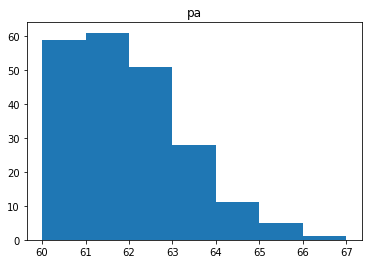

min: 60
max: 67
mean: 61.495370370370374
variance: 1.786024978466839
stan dev: 1.3364224550892727


In [9]:
examine(data, "pa", 7)

In [107]:
data[data.pa==67]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
200,https://www.mayoclinic.org/diseases-conditions...,67,seasonal affective disorder (sad),33,Seasonal affective disorder (SAD) is a type of...,150,47380,1625,9835,4191,0,67,45,8,2,71,45,736627.0


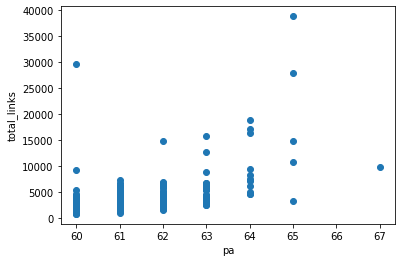

Covariance: 3045.51357
Correlation: 0.51073
R squared: 0.26084
Linear Regression Slope: 1705.1909142423108


In [113]:
relate(data.pa, data.total_links)

## Header Length (H1-1)

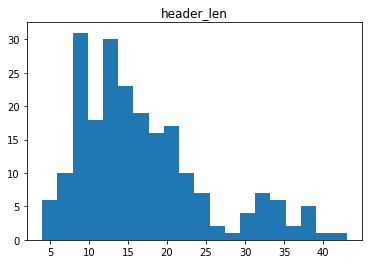

min: 4
max: 43
mean: 16.62037037037037
variance: 72.02265288544359
stan dev: 8.486616103338456


In [10]:
examine(data, "header_len", 20)

SEO strategy recommends short, descriptive h1 headers that contains a page keyword; here, that means the name of the condition. It thus is unsurprising that the data peaks between 10 and 20 characters. It is not a normal distribution, since headers are more likely to have more characters than fewer; those that have more are likely conditions with long names or two different names (one more scientific, one translated from medical terminology into a name more evident), where one is listed after the other in parentheses. 

In [11]:
# like these
data[data["header_len"]>30]['header'].values.tolist()

['gastroesophageal reflux disease (gerd)',
 'drug addiction (substance use disorder)',
 'amyotrophic lateral sclerosis (als)',
 'antisocial personality disorder',
 'arteriosclerosis / atherosclerosis',
 'benign paroxysmal positional vertigo (bppv)',
 'benign prostatic hyperplasia (bph)',
 'high blood pressure (hypertension)',
 'low blood pressure (hypotension)',
 'borderline personality disorder',
 "hodgkin's lymphoma (hodgkin's disease)",
 'depression (major depressive disorder)',
 'coronavirus disease 2019 (covid-19)',
 'sudden infant death syndrome (sids)',
 'enlarged breasts in men (gynecomastia)',
 'helicobacter pylori (h. pylori) infection',
 'hypothyroidism (underactive thyroid)',
 'inflammatory bowel disease (ibd)',
 'narcissistic personality disorder',
 'nonalcoholic fatty liver disease',
 'peripheral artery disease (pad)',
 'panic attacks and panic disorder',
 'polycystic ovary syndrome (pcos)',
 'post-traumatic stress disorder (ptsd)',
 'seasonal affective disorder (sad)',
 

## Meta Description Length

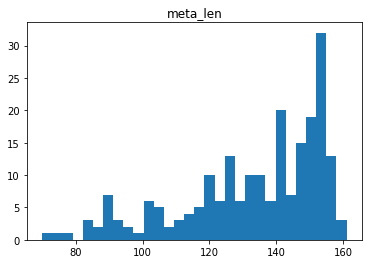

min: 70
max: 161
mean: 132.91666666666666
variance: 436.71860465116276
stan dev: 20.897813394017152


In [12]:
examine(data, "meta_len", 30)

In [13]:
# check how many are longer than 160 characters
data.loc[data["meta_len"]>160]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
134,https://www.mayoclinic.org/diseases-conditions...,61,graves' disease,15,"Learn about the signs and symptoms, causes and...",161,55802,1949,5364,693,10,67,45,12,5,81,49,2020-01-07


In [14]:
data.loc[data["meta_len"]>160]['meta_len']

134    161
Name: meta_len, dtype: int64

According to Moz (https://moz.com/learn/seo/meta-description), Google usually only shows meta descriptions up to 160 characters long. The Mayo Clinic has kept all but 1 of their top-ranking Symptoms and Causes meta descriptions within this limit, and that one page is only 1 character over the limit.

## Page Size (bytes)

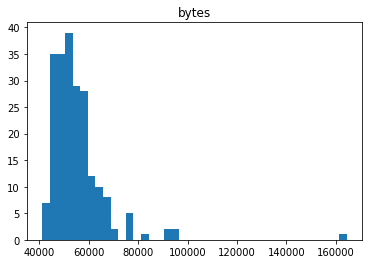

min: 41133
max: 164386
mean: 55134.17592592593
variance: 138044112.84332475
stan dev: 11749.217541748249


In [15]:
examine(data, "bytes", 40)

In [16]:
# the outlier is a page on COVID-19!
data.loc[data["bytes"]==164386]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,2020-05-21


Unsurprisingly, the largest page is a page on COVID-19, to which the Mayo Clinic may well still be adding as the world continues to research the virus that has caused the current pandemic. The publication date is listed as May 12, 2020, within this month.

Besides the page on coronavirus, there are still a number of larger pages far from the peak:

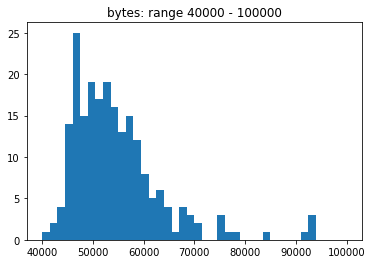

In [67]:
exclude(data, 'bytes', 40000, 100000, 40)

In [68]:
data.loc[data.bytes>75000]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
14,https://www.mayoclinic.org/diseases-conditions...,63,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,4124,1217,10,97,73,15,7,127,85,737036.0
39,https://www.mayoclinic.org/diseases-conditions...,63,high blood pressure (hypertension),34,"Learn about the symptoms, treatment and preven...",142,83830,3147,6494,1587,10,85,58,9,3,131,92,736826.0
42,https://www.mayoclinic.org/diseases-conditions...,63,stroke,6,Promptly spotting stroke symptoms leads to fas...,89,75718,3539,4447,1100,10,86,63,23,15,92,61,737539.0
43,https://www.mayoclinic.org/diseases-conditions...,61,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,2734,797,10,96,73,88,49,139,106,737385.0
48,https://www.mayoclinic.org/diseases-conditions...,60,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,2553,585,10,104,80,26,21,130,99,737040.0
56,https://www.mayoclinic.org/diseases-conditions...,61,pancreatic cancer,17,"Pancreatic cancer — Overview covers symptoms, ...",152,76004,2881,2805,698,10,87,63,21,11,93,64,737539.0
62,https://www.mayoclinic.org/diseases-conditions...,64,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,7463,1540,10,88,64,39,26,130,88,736775.0
77,https://www.mayoclinic.org/diseases-conditions...,65,depression (major depressive disorder),38,Depression is a mood disorder that causes a pe...,141,75409,2681,14873,2520,10,80,57,12,6,120,81,736728.0
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,737566.0
103,https://www.mayoclinic.org/diseases-conditions...,63,diabetes,8,Learn more about the different types of this b...,109,78005,3448,6681,1371,10,70,47,7,2,132,92,736914.0


Again, the trend makes sense; these larger pages are all about more commonly diagnosed conditions that have various forms.

## Word Count

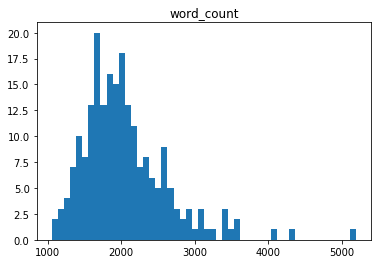

min: 1055
max: 5194
mean: 2050.3333333333335
variance: 347291.97209302324
stan dev: 589.314832744793


In [18]:
examine(data, "word_count", 50)

Word count is a little more difficult to analyze in terms of SEO. Web pages should not be too thin, and should include good "anchor content" unique to the page and the subject, but lots of content does not necessarily mean that it is of good quality. There is a general consensus in the SEO world that a word count of around 1500 is average for high-ranking pages, though the suggested amount of content varies for different kinds of web pages (such as a blog versus a healthcare education page). The Mayo Clinic's average word count is 1655 for their Symptoms and Causes pages, but we can see from the histogram that there appear to be some outliers affecting that number.

In [19]:
# unsurprisingly, coronavirus again
data.loc[data["word_count"]==5194]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,2020-05-21


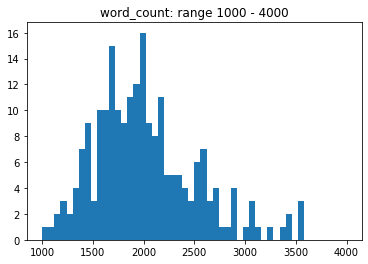

In [69]:
exclude(data, 'word_count', 1000, 4000, 50)

In [20]:
# other pages with word count far above average
data.loc[data["word_count"]>4000]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
7,https://www.mayoclinic.org/diseases-conditions...,62,drug addiction (substance use disorder),39,"With drug addiction (substance use disorder), ...",160,70000,4308,4641,1013,10,69,46,10,5,74,46,2017-10-26
62,https://www.mayoclinic.org/diseases-conditions...,64,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,7463,1540,10,88,64,39,26,130,88,2018-03-22
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,2020-05-21


The other pages with high word count are heart disease and substace abuse disorder. Both are relatively common conditions, and both describe a range of conditions, explaining the need for more words.

## Link Authority
### Total Links
*Total number of links to each URL in the dataset.*

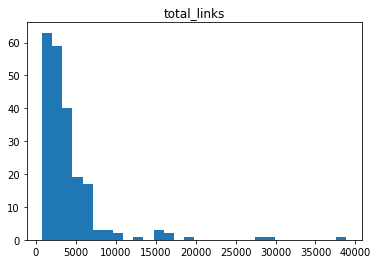

min: 786
max: 38868
mean: 4146.416666666667
variance: 19909363.60232558
stan dev: 4461.990990838684


In [22]:
examine(data, "total_links", 30)

### Inbound Domains
*Number of other websites (domains) that link to a URL in the dataset.*

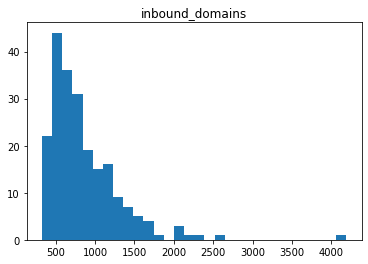

min: 327
max: 4191
mean: 861.5324074074074
variance: 208711.86871231697
stan dev: 456.8499411320056


In [58]:
examine(data, "inbound_domains", 30)

### External Links
*Number of links from this page to another website (another domain).*

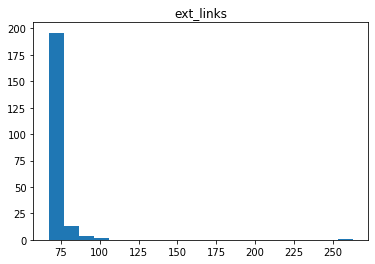

min: 67
max: 263
mean: 71.66203703703704
variance: 198.56897071490096
stan dev: 14.091450270107082


In [31]:
examine(data, "ext_links", 20)

This outlier is more extreme than the others we have seen in the data so far.

In [32]:
data[data.ext_links>100]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
48,https://www.mayoclinic.org/diseases-conditions...,60,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,2553,585,10,104,80,26,21,130,99,2018-12-12
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,2020-05-21


And we see why: the Symptoms and Causes pages on the Mayo Clinic domain with the most links to other websites are those for cancer and coronavirus, widespread, newsworthy, very serious conditions that are currently affecting the lives of many, and about which people need a wealth of information to learn from and respond to to help with prevention and treatment.

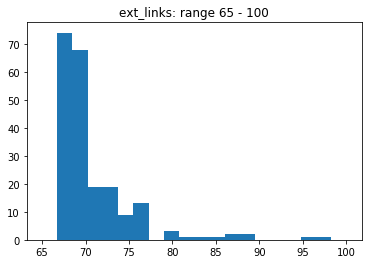

In [33]:
exclude(data, "ext_links", 65, 100, 20)

In [57]:
data[data.ext_links>90]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
14,https://www.mayoclinic.org/diseases-conditions...,63,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,4124,1217,10,97,73,15,7,127,85,737036.0
43,https://www.mayoclinic.org/diseases-conditions...,61,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,2734,797,10,96,73,88,49,139,106,737385.0
48,https://www.mayoclinic.org/diseases-conditions...,60,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,2553,585,10,104,80,26,21,130,99,737040.0
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,737566.0


Other such pages include different forms of cancer and common, perilous conditions.

### Unique External Links
*Number of links from this page to another website with links to the same page counted only once.*

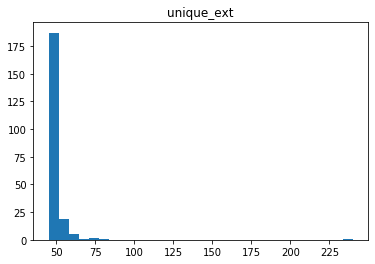

min: 45
max: 240
mean: 48.976851851851855
variance: 193.74364771748495
stan dev: 13.919182724480807


In [35]:
examine(data, "unique_ext", 30)

In [36]:
data[data.unique_ext>80]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,2020-05-21


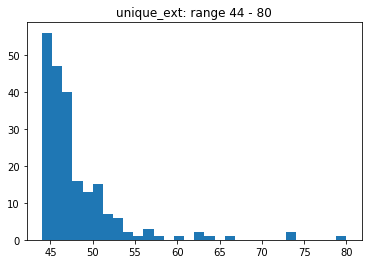

In [37]:
exclude(data, "unique_ext", 44,80, 30)

In [56]:
data[data.unique_ext>65]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
14,https://www.mayoclinic.org/diseases-conditions...,63,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,4124,1217,10,97,73,15,7,127,85,737036.0
43,https://www.mayoclinic.org/diseases-conditions...,61,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,2734,797,10,96,73,88,49,139,106,737385.0
48,https://www.mayoclinic.org/diseases-conditions...,60,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,2553,585,10,104,80,26,21,130,99,737040.0
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,737566.0
127,https://www.mayoclinic.org/diseases-conditions...,62,influenza (flu),15,"Learn more about the symptoms, causes and prev...",131,68565,2899,4381,949,10,89,66,8,3,82,50,737336.0


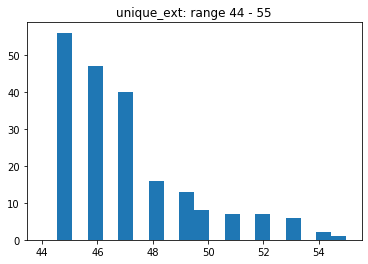

In [39]:
exclude(data, "unique_ext", 44, 55, 20)

### Inlinks
*Number of links to this page on the Mayo Clinic domain.*

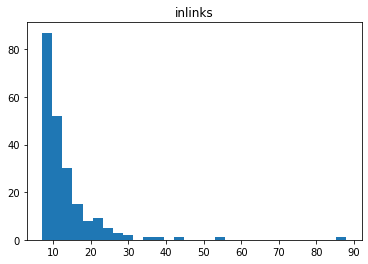

min: 7
max: 88
mean: 12.99537037037037
variance: 68.74881567614126
stan dev: 8.291490558165115


In [23]:
examine(data, "inlinks", 30)

Most Symptoms and Causes pages on the Mayo Clinic site seem to have around 10 other Mayo Clinic pages linking to them. These would likely be related conditions and the Diagnosis and Treatment, Doctors and Departments, and Care at Mayo Clinic pages for the condition, as well as the index page the condition is listed under and any other related page on the website that for which linking to a Symptoms and Causes page would make sense.

In [24]:
data[data.inlinks>60]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
43,https://www.mayoclinic.org/diseases-conditions...,61,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,2734,797,10,96,73,88,49,139,106,2019-11-22


In [25]:
data[data.inlinks>35]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
23,https://www.mayoclinic.org/diseases-conditions...,60,heart arrhythmia,16,Learn about common heart disorders that can ca...,103,68502,3397,2182,481,10,67,45,54,34,94,65,2019-11-19
43,https://www.mayoclinic.org/diseases-conditions...,61,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,2734,797,10,96,73,88,49,139,106,2019-11-22
49,https://www.mayoclinic.org/diseases-conditions...,62,colon cancer,12,Find out about symptoms and risk factors for c...,158,67832,2531,6060,1036,10,83,60,43,21,96,64,2019-10-08
62,https://www.mayoclinic.org/diseases-conditions...,64,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,7463,1540,10,88,64,39,26,130,88,2018-03-22


It's interesting that breast cancer is the page with the most internal inlinks of those I am examining. There are several types of breast cancer as well as conditions that can lead to breast cancer, and of course there are also many other kinds of cancer. It is possible that such pages link between one another on the Mayo Clinic domain.

### Unique Inlinks
*Number of links to this page on the Mayo Clinic domain with links from the same page counted only once.*

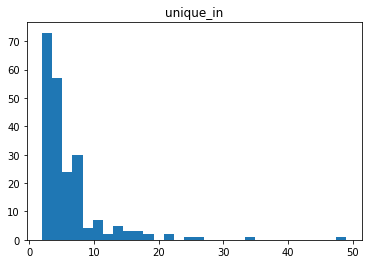

min: 2
max: 49
mean: 6.125
variance: 29.570348837209302
stan dev: 5.4378625246699


In [26]:
examine(data, "unique_in", 30)

This data largely resembles the total inlinks, except on a somewhat smaller scale.

In [27]:
relate(data.inlinks, data.unique_in)

Covariance: 43.72151
Correlation: 0.96969
R squared: 0.9403
Linear Regression Slope: 0.6359602154292843


In [28]:
data[data.unique_in>35]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
43,https://www.mayoclinic.org/diseases-conditions...,61,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,2734,797,10,96,73,88,49,139,106,2019-11-22


As one would therefore expect, the page that had the most inlinks also has the most unique inlinks.

## Outlinks
*Number of links from this page to other pages on the Mayo Clinic domain.*

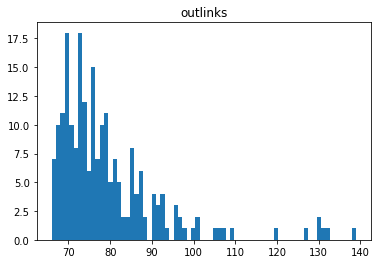

min: 66
max: 139
mean: 79.57407407407408
variance: 162.27355727820844
stan dev: 12.738663873350628


In [29]:
examine(data, "outlinks", 70)

We can see that Symptoms and Causes pages tend to link more to other page on the Mayo Clinic domain than be linked to. This is largely intuitive since it is more common for pages about conditions and diseases to link to pages for clinics that treat them, research summaries about them, or patient stories than for those pages to link back to the page for the condition itself. 

### Unique Outlinks
*Number of links from this page to other pages on the Mayo Clinic domain with links to the same page counted only once.*

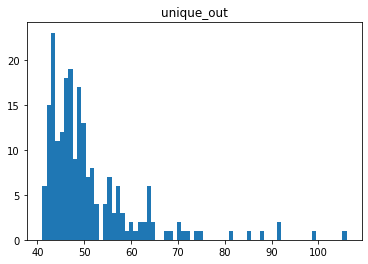

min: 41
max: 106
mean: 50.967592592592595
variance: 108.7198751076658
stan dev: 10.426882329232733


In [30]:
examine(data, "unique_out", 70)

Again, this data resembles the data for total outlinks in shape; we still get the outliers.

## publication date

In [40]:
data.pub_date[0]

'2019-06-20'

In [41]:
# check date type
type(data.pub_date[0])

str

In [42]:
# convert pub_date from string to datetime_ob
dat = []
for date in data.pub_date:
    ob = datetime.strptime(date, '%Y-%m-%d')
    dat.append(ob)
    
# convert pub_date from datetime_ob to float
data.pub_date = dt.date2num(dat)
type(data["pub_date"][0])

numpy.float64

In [43]:
print("min:", data["pub_date"].min(), dt.num2date(data["pub_date"].min()).strftime('%Y-%m-%d'))
print("max:", data["pub_date"].max(), dt.num2date(data["pub_date"].max()).strftime('%Y-%m-%d'))

min: 736230.0 2016-09-23
max: 737566.0 2020-05-21


In [44]:
# updated today! (may 21, 2020)
data[data.pub_date == 737566.0]

,url,pa,header,header_len,meta,meta_len,bytes,word_count,total_links,inbound_domains,outbound_domains,ext_links,unique_ext,inlinks,unique_in,outlinks,unique_out,pub_date
85,https://www.mayoclinic.org/diseases-conditions...,62,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,14924,554,0,263,240,15,7,97,62,737566.0


In [45]:
# function to examine relationship between publication date and any other column with a scatter plot
def pub(col, colname):
    plt.plot_date(x=data["pub_date"], y=col, xdate=True, ydate=False, alpha=0.5)
    plt.title("publication date, " + colname)
    plt.show()

## Analysis

Main SEO boxes to check:
- link authority
- quality content
- publication date

Others that may give pages a boost:
- good headers
- good meta description
- word count
- page size

In [114]:
data.columns

Index(['url', 'pa', 'header', 'header_len', 'meta', 'meta_len', 'bytes',
       'word_count', 'total_links', 'inbound_domains', 'outbound_domains',
       'ext_links', 'unique_ext', 'inlinks', 'unique_in', 'outlinks',
       'unique_out', 'pub_date'],
      dtype='object')

In [118]:
for column in ['header_len', 'meta_len', 'bytes', 'word_count', 'total_links', 'inbound_domains', 'outbound_domains', 'ext_links', 'unique_ext', 'inlinks', 'unique_in', 'outlinks',
       'unique_out', 'pub_date']:
    model = LinearRegression().fit(data[[column]], data["pa"])
    print("%s coefficient: %.5f" % (column, model.coef_))

header_len coefficient: 0.01018
meta_len coefficient: 0.00292
bytes coefficient: 0.00003
word_count coefficient: 0.00049
total_links coefficient: 0.00015
inbound_domains coefficient: 0.00259
outbound_domains coefficient: -0.07575
ext_links coefficient: 0.00893
unique_ext coefficient: 0.00844
inlinks coefficient: -0.00274
unique_in coefficient: -0.00462
outlinks coefficient: 0.02845
unique_out coefficient: 0.03168
pub_date coefficient: -0.00080
